## Data-Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### load raw dataset

In [2]:
raw = pd.read_csv('dataset_diabetes/diabetic_data.csv')

In [3]:
raw.columns.values

array(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'], dtype=object)

In [101]:
#raw['admission_type_id'] = raw['admission_type_id'].apply(lambda x: '?' if x == 6 else x)
#raw['admission_source_id'] = raw['admission_source_id'].apply(lambda x: '?' if x == 17 else x)
#raw['discharge_disposition_id'] = raw['discharge_disposition_id'].apply(lambda x: '?' if x == 18 else x)

### plot missing values

In [5]:
missing = raw.apply(lambda x: x.map(lambda y: True if y=='?' else False).sum()) / len(raw)

In [94]:
missing[missing > 0].sort_values()

diag_1               0.000206
diag_2               0.003518
diag_3               0.013983
race                 0.022336
payer_code           0.395574
medical_specialty    0.490822
weight               0.968585
dtype: float64

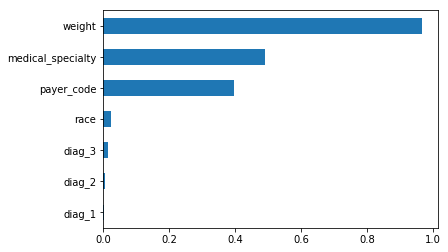

In [7]:
missing[missing > 0].sort_values().plot(kind = 'barh')

### clean missing values

In [8]:
diabetes = raw.drop(['encounter_id', 'medical_specialty','payer_code', 'patient_nbr','weight'], axis = 1)
diabetes = diabetes[diabetes['race'] != '?']
diabetes = diabetes[diabetes['diag_1'] != '?']
#get rid of missing diag_2 and number_diagnoses > 1
#or
#get rid of missing diag_3 and number_diagnoses > 2
mask_diag_2 = (diabetes['number_diagnoses'] > 1)&(diabetes['diag_2'] == '?')
mask_diag_3 = (diabetes['number_diagnoses'] > 2)&(diabetes['diag_3'] == '?')
diabetes = diabetes[~mask_diag_2][~mask_diag_3]

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### sample response variable distribution 

In [10]:
diabetes['readmitted'].value_counts()/len(diabetes)

NO     0.535552
>30    0.352195
<30    0.112253
Name: readmitted, dtype: float64

### inspect medicines

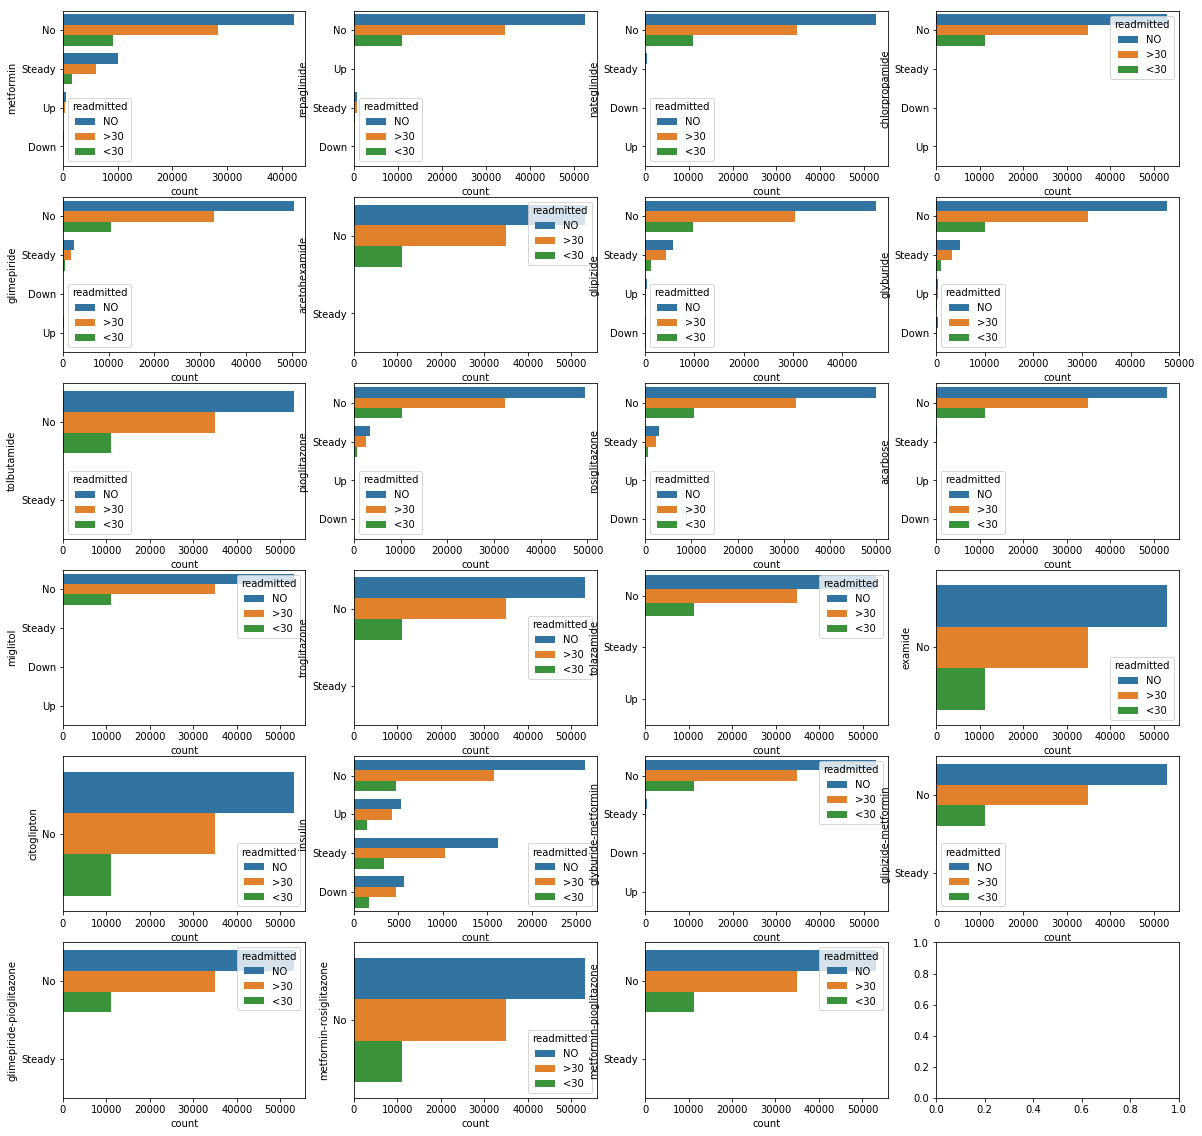

In [12]:
fig, ((ax1, ax2, ax3, ax4),( ax5, ax6, ax7, ax8), 
      (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16), 
      (ax17, ax18, ax19, ax20),(ax21, ax22, ax23, ax24)) = subplots(nrows=6,ncols=4,figsize=(20,20))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, 
      ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20,
      ax21, ax22, ax23]

med = ['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
       'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
       'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone']

for i,a in enumerate(ax):
    sns.countplot(data=diabetes, y = med[i], hue='readmitted', ax=a)

In [13]:
med.remove('insulin')
diabetes = diabetes.drop(med, axis = 1)
diabetes.reset_index(drop=True, inplace=True)

### regroup diagnoses

In [14]:
def group_diag(diag):     
    if re.match('^[1-9]$',diag) or re.match('1[0-3]',diag):
        return 'diag1'
    elif re.match('1[4-9]',diag) or re.match('2[0-3]',diag):
        return 'diag2'
    elif re.match('2[467]',diag):
        return 'diag3'
    elif re.match('2(?=50)',diag):
        return 'diabetes'
    elif re.match('25[^0]', diag):
        return 'diag3'
    elif re.match('28',diag):
        return 'diag4'
    elif re.match('29',diag) or re.match('3[0-1]',diag):
        return 'diag5'
    elif re.match('3[2-8]',diag):
        return 'diag6'
    elif re.match('39',diag) or re.match('4[0-5]',diag):
        return 'diag7'
    elif re.match('4[6-9]',diag) or re.match('5[0-1]',diag):
        return 'diag8'
    elif re.match('5[2-7]',diag):
        return 'diag9'
    elif re.match('5[8-9]',diag) or re.match('6[0-2]',diag):
        return 'diag10'
    elif re.match('6[3-7]',diag):
        return 'diag11'
    elif re.match('6[8-9]',diag) or re.match('70',diag):
        return 'diag12'
    elif re.match('7[1-3]',diag):
        return 'diag13'
    elif re.match('7[4-5]',diag):
        return 'diag14'
    elif re.match('7[6-7]',diag):
        return 'diag15'
    elif re.match('7[8-9]',diag):
        return 'diag16'   
    elif re.match('[8-9]',diag):
        return 'diag17'
    elif re.match('[VE]',diag):
        return 'supplementary'
    elif diag == '?':
        return 'missing'

In [15]:
# diabetes.diag_1.apply(group_diag).value_counts()/len(diabetes)

In [16]:
# diabetes.diag_2.apply(group_diag).value_counts()/len(diabetes)

In [17]:
# diabetes.diag_3.apply(group_diag).value_counts()/len(diabetes)

In [18]:
# diag_1_group = ['diag7', 'diag8', 'diag9', 'diag16', 'diag17', 'diag10', 'diabetes']
# diag_2_group = ['diag7', 'diag8', 'diag3', 'diag10', 'diabetes']
# diag_3_group = ['diag7', 'diag8', 'diag3', 'diag10', 'supplementary', 'diabetes']

# diabetes.diag_1 = diabetes.diag_1.apply(lambda x: 'other' if x not in diag_1_group else x)
# diabetes.diag_2 = diabetes.diag_2.apply(lambda x: 'other' if x not in diag_2_group else x)
# diabetes.diag_3 = diabetes.diag_3.apply(lambda x: 'other' if x not in diag_3_group else x)

In [19]:
diabetes.diag_1 = diabetes.diag_1.apply(group_diag)
diabetes.diag_2 = diabetes.diag_2.apply(group_diag)
diabetes.diag_3 = diabetes.diag_3.apply(group_diag)

In [20]:
diabetes.admission_type_id = diabetes.admission_type_id.astype(str)
diabetes.admission_source_id = diabetes.admission_source_id.astype(str)
diabetes.discharge_disposition_id = diabetes.discharge_disposition_id.astype(str)

### inspect categorical data

In [21]:
cat = diabetes.select_dtypes(include=[object]).drop('readmitted',axis=1).columns.values.tolist()
cat

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'insulin',
 'change',
 'diabetesMed']

In [22]:
# fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), 
#       (ax7, ax8, ax9), (ax10, ax11, ax12), 
#       (ax13, ax14, ax15)) = subplots(nrows=5,ncols=3,figsize=(24,20))
# ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14]

# for i,a in enumerate(ax):
#     sns.countplot(data=diabetes, y = cat[i], hue='readmitted', ax=a)

In [23]:
#clean gender
diabetes = diabetes[diabetes['gender'] != 'Unknown/Invalid']

### For non-tree models

In [22]:
# #rebin admission & discharge
# diabetes.admission_type_id = diabetes.admission_type_id.apply(lambda x: 'other' if x not in ['1','2','3'] else x)
# diabetes.admission_source_id = diabetes.admission_source_id.apply(lambda x: 'other' if x not in ['1','7'] else x)
# diabetes.discharge_disposition_id = diabetes.discharge_disposition_id.apply(lambda x: 'other' if x not in ['1'] else x)

# #rebin age
# age1 = ['[40-50)','[30-40)','[20-30)','[10-20)','[0-10)']
# age2 = ['[60-70)','[50-60)']
# age3 = ['[70-80)','[80-90)','[90-100)']

# def regroup_age(age):
#     if age in age1:
#         return '[0-50)'
#     if age in age2:
#         return '[50-70)'
#     if age in age3:
#         return '[70-100)'

# diabetes.age = diabetes.age.apply(regroup_age)

In [23]:
# fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), 
#       (ax7, ax8, ax9), (ax10, ax11, ax12), 
#       (ax13, ax14, ax15)) = subplots(nrows=5,ncols=3,figsize=(24,20))
# ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14]

# for i,a in enumerate(ax):
#     sns.countplot(data=diabetes, y = cat[i], hue='readmitted', ax=a)

### numerical variables

In [24]:
num = diabetes.select_dtypes(include=[int64]).columns.values.tolist()
num

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [25]:
#num_log = pd.concat([diabetes[num].apply(lambda x: np.log(x+1)),diabetes.readmitted], axis = 1)

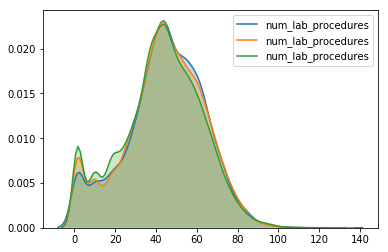

In [26]:
sns.kdeplot(data = diabetes[diabetes['readmitted'] == '<30']['num_lab_procedures'],shade=True, legend='<30')
sns.kdeplot(data = diabetes[diabetes['readmitted'] == '>30']['num_lab_procedures'],shade=True)
sns.kdeplot(data = diabetes[diabetes['readmitted'] == 'NO']['num_lab_procedures'],shade=True)

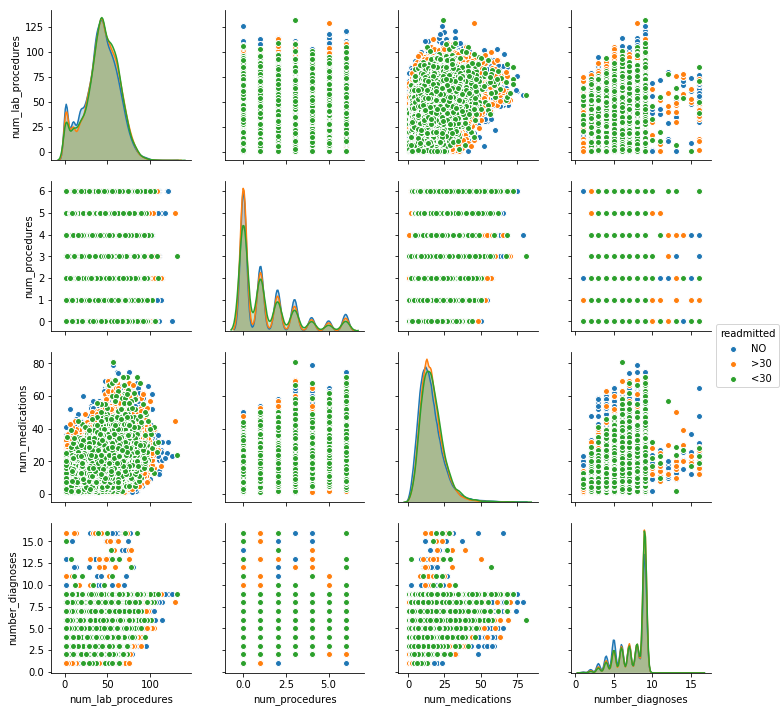

In [27]:
sns.pairplot(data = diabetes, diag_kind='kde',hue = 'readmitted', diag_kws=dict(shade=True),vars=['num_lab_procedures','num_procedures','num_medications','number_diagnoses']);

In [28]:
# sns.distplot(diabetes[(diabetes['readmitted'] == '>30')].num_medications)

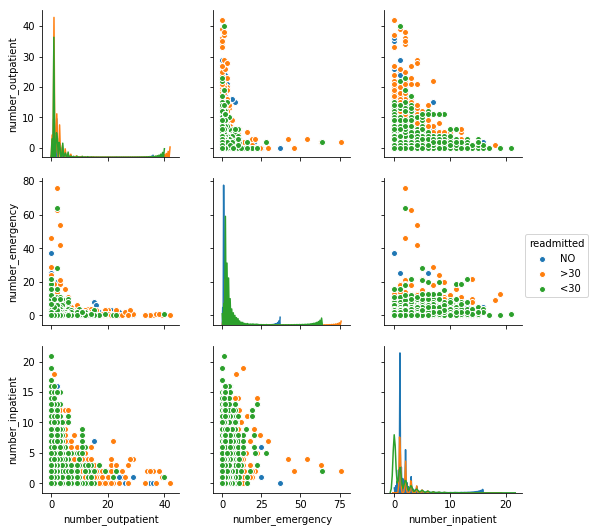

In [29]:
sns.pairplot(data = diabetes, hue='readmitted', diag_kind='kde', vars=['number_outpatient','number_emergency','number_inpatient']);

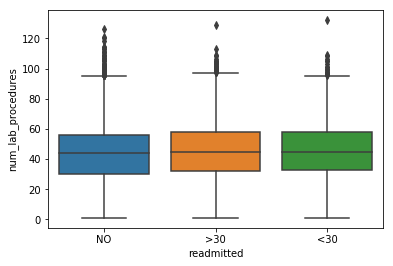

In [30]:
sns.boxplot(x = 'readmitted',  y='num_lab_procedures', data = diabetes)

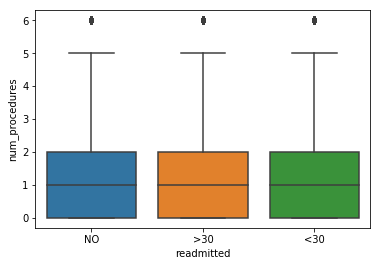

In [31]:
sns.boxplot(x = 'readmitted',  y='num_procedures', data = diabetes)

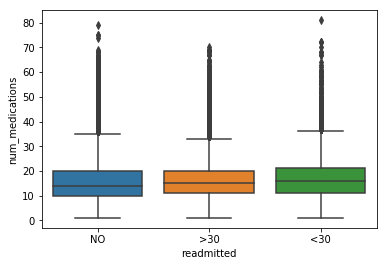

In [32]:
sns.boxplot(x = 'readmitted',  y='num_medications', data = diabetes)

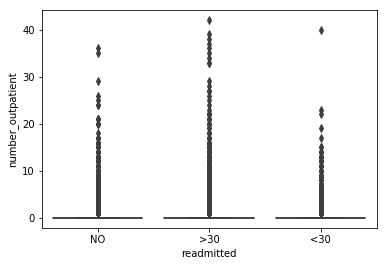

In [33]:
sns.boxplot(x = 'readmitted',  y='number_outpatient', data = diabetes)

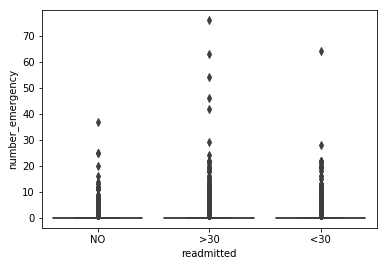

In [34]:
sns.boxplot(x = 'readmitted',  y='number_emergency', data = diabetes)

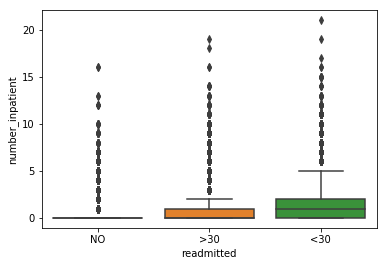

In [35]:
sns.boxplot(x = 'readmitted',  y='number_inpatient', data = diabetes)

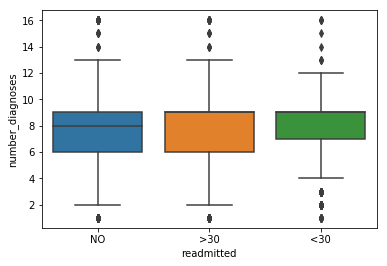

In [36]:
sns.boxplot(x = 'readmitted',  y='number_diagnoses', data = diabetes)

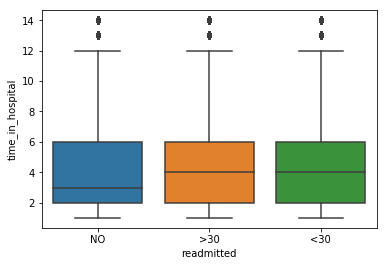

In [37]:
sns.boxplot(x = 'readmitted',  y='time_in_hospital', data = diabetes)

### Save cleaned data

In [37]:
diabetes.to_csv('diabetes.csv', index=None, encoding = 'utf-8')

## Classifier

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import time
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, auc, brier_score_loss, average_precision_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, label_binarize, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from itertools import cycle
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [39]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras import optimizers
from keras import utils
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers.normalization import BatchNormalization
from keras.constraints import maxnorm
from keras.optimizers import Nadam

Using TensorFlow backend.


In [96]:
diabetes = pd.read_csv('diabetes.csv')

In [97]:
diabetes.readmitted.value_counts()/len(diabetes)

NO     0.535547
>30    0.352199
<30    0.112254
Name: readmitted, dtype: float64

In [98]:
diabetes['admission_type_id'] = diabetes.loc[:,'admission_type_id'].astype(str)
diabetes['admission_source_id'] = diabetes.loc[:,'admission_source_id'].astype(str)
diabetes['discharge_disposition_id'] = diabetes.loc[:,'discharge_disposition_id'].astype(str)

In [99]:
num = diabetes.select_dtypes(include=[int64]).columns.values.tolist()
cat = diabetes.select_dtypes(include=[object]).drop('readmitted',axis=1).columns.values.tolist()

### Binary ( < 30 & >30 vs NO )

### Non-linear Models

In [100]:
encoder = OneHotEncoder()
le = LabelEncoder()

X_num = np.array(diabetes[num])
X_cat = diabetes[cat].apply(le.fit_transform)
X_cat = encoder.fit_transform(X_cat).toarray()
X_nl = np.concatenate((X_num,X_cat), axis = 1)

y = diabetes.readmitted.apply(lambda x: 0 if x =='NO' else 1)

X_train, X_test, y_train, y_test = train_test_split(X_nl, y, test_size=0.3, random_state=24)

X_train_num, X_train_cat = X_train[:,:8], X_train[:,8:]
X_test_num, X_test_cat = X_test[:,:8], X_test[:,8:]

### Getting feature dataframe with feature names

In [101]:
#get X dataframe with feature names
cat_list = []
for c in cat:
    values = sorted(set(diabetes[c].values.tolist()))
    for v in values:
        cat_list.append('{}_{}'.format(c,v))   

col_names = num + cat_list
X_features_nl = pd.DataFrame(X_nl, columns=col_names)

In [102]:
X_features_nl.shape

(99248, 148)

In [103]:
baseline = y_test.value_counts()[1]*1.0/len(y_test)
baseline

0.46267002518891687

### Tuning Tree-Based Ensemble Models

#### RF

In [12]:
# clf_rf = RandomForestClassifier()
# n_estimators = [10, 50, 100, 200, 300]
# max_features = ['sqrt', 'log2', None]
# param_grid = dict(max_features=max_features, n_estimators=n_estimators)
# kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=24)
# grid_search_rf = GridSearchCV(clf_rf, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
# grid_search_rf.fit(X_train, y_train)
# result_rf = grid_search_rf.cv_results_

In [10]:
#from cloud instance
mean_test_score_rf = array([ 0.68258068,  0.68684734,  0.68924676,  0.68989952,  0.69025325,
        0.68058828,  0.68699311,  0.68829424,  0.68985451,  0.68987248,
        0.67338744,  0.67577573,  0.6773056 ,  0.67751356,  0.67801686])

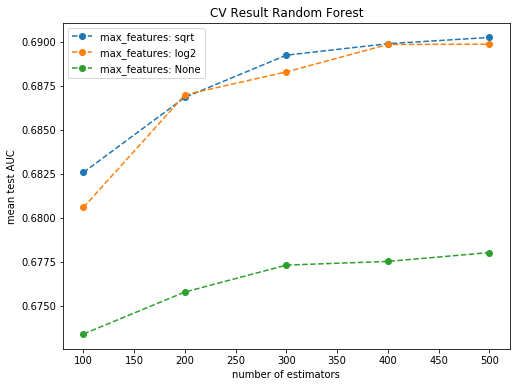

In [11]:
n_estimators = [100, 200, 300, 400, 500]
max_features = ['sqrt', 'log2', None]
mean_test_score_rf = mean_test_score_rf.reshape(len(max_features),len(n_estimators))
plt.figure(figsize=(8,6))
for i, score in enumerate(mean_test_score_rf):
    plt.plot(n_estimators,mean_test_score_rf[i,], '--',marker = 'o', label = 'max_features: %s'%(max_features[i]))
plt.xlabel('number of estimators')
plt.ylabel('mean test AUC')
plt.title('CV Result Random Forest')
plt.legend()

#### AdaBoost

In [12]:
# clf_ab = AdaBoostClassifier()
# n_estimators = [100, 200, 300, 400, 500]
# learning_rate = [0.001, 0.01, 0.1, 1]
# param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
# kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=24)
# grid_search_ab = GridSearchCV(clf_ab, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
# grid_search_ab.fit(X_train, y_train)
# result_ab = grid_search_ab.cv_results_


In [13]:
#from cloud instance
mean_test_score_ab = array([ 0.60301   ,  0.60301   ,  0.61146081,  0.61146081,  0.61146081,
        0.62620243,  0.659287  ,  0.66153394,  0.6686661 ,  0.6712474 ,
        0.67867981,  0.68375589,  0.68640542,  0.68782401,  0.68869374,
        0.68905253,  0.68999348,  0.68978104,  0.68959938,  0.68956937])

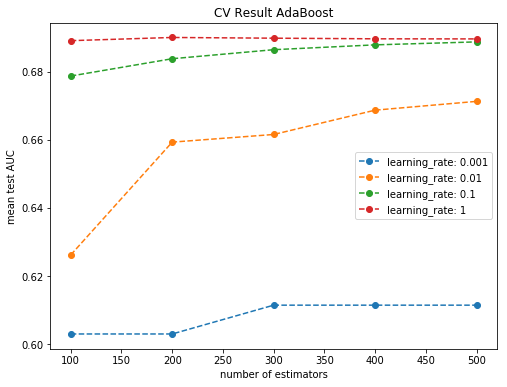

In [14]:
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.001, 0.01, 0.1, 1]
mean_test_score_ab = mean_test_score_ab.reshape(len(learning_rate),len(n_estimators))
plt.figure(figsize=(8,6))
for i, score in enumerate(mean_test_score_ab):
    plt.plot(n_estimators,mean_test_score_ab[i,], '--',marker = 'o', label = 'learning_rate: %s'%(learning_rate[i]))
plt.xlabel('number of estimators')
plt.ylabel('mean test AUC')
plt.title('CV Result AdaBoost')
plt.legend()

#### Gradient Boosting

In [15]:
# clf_gb = GradientBoostingClassifier()
# n_estimators = [100, 200, 300, 400, 500]
# learning_rate = [0.0001, 0.001, 0.01, 0.1]
# max_depth = [1, 3, 6, 10]
# param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth = max_depth)
# kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=24)
# grid_search_gb = GridSearchCV(clf_gb, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
# grid_search_gb.fit(X_train, y_train)
# result_gb = grid_search_gb.cv_results_

In [17]:
mean_test_score_gb = array([ 0.60301   ,  0.60301   ,  0.60301   ,  0.60301   ,  0.60301   ,
        0.64557564,  0.64557564,  0.64557564,  0.64557564,  0.64557564,
        0.66429923,  0.66448325,  0.6647553 ,  0.66487647,  0.66535463,
        0.66569096,  0.66627749,  0.66712409,  0.6683245 ,  0.66908532,
        0.60301   ,  0.60301   ,  0.60844086,  0.61146081,  0.61146081,
        0.64672927,  0.65108781,  0.65218957,  0.65668658,  0.66059261,
        0.66580915,  0.66906337,  0.67140441,  0.67296517,  0.67494973,
        0.67153496,  0.67369803,  0.67502385,  0.67646981,  0.6779135 ,
        0.61862406,  0.65694137,  0.65910138,  0.66511954,  0.66896728,
        0.66730472,  0.67399948,  0.67896586,  0.6822108 ,  0.68442617,
        0.67959957,  0.68587534,  0.68980998,  0.6919573 ,  0.69332873,
        0.6825147 ,  0.68762894,  0.69019364,  0.69132972,  0.69185831,
        0.67675685,  0.68303419,  0.68608021,  0.68764385,  0.68861947,
        0.69078384,  0.69504094,  0.69731902,  0.69818632,  0.69850338,
        0.69524857,  0.69558894,  0.69414956,  0.69240588,  0.69021014,
        0.6883348 ,  0.68230733,  0.67731607,  0.67273513,  0.67148998])

In [21]:
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
max_depth = [1, 3, 6, 10]
mean_test_score_gb = np.swapaxes(mean_test_score_gb.reshape(len(learning_rate),len(max_depth), len(n_estimators)),0,1)


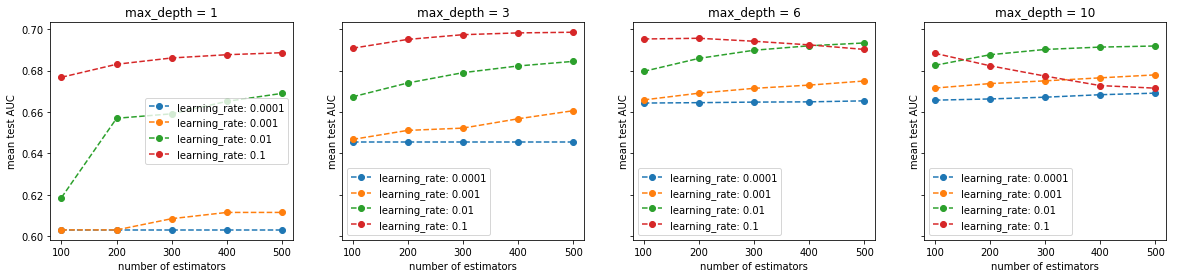

In [28]:
fig, (ax1, ax2, ax3, ax4) = subplots(nrows=1,ncols=4,figsize=(20,4), sharey=True)
ax = [ax1, ax2, ax3, ax4]

for i, score in enumerate(mean_test_score_gb):
    for j,s in enumerate(score):
        ax[i].plot(n_estimators,score[j,], '--',marker = 'o', label = 'learning_rate: %s'%(learning_rate[j]))
    ax[i].set_xlabel('number of estimators')
    ax[i].set_ylabel('mean test AUC')
    ax[i].set_title('max_depth = %i'%max_depth[i])
    ax[i].legend()

#### XGBoost

In [165]:
clf_xgb = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
reg_lambda = [0.001, 0.01, 0.1, 1, 10]
# sub_sample = [0.1, 0.5, 1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators,reg_lambda = reg_lambda, sub_sample = sub_sample)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=24)
grid_search_xgb = GridSearchCV(clf_xgb, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_search_xgb.fit(X_train, y_train)
result_xgb = grid_search_xgb.cv_results_

In [176]:
mean_test_score_xgb = result_xgb['mean_test_score']

In [177]:
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
reg_lambda = [0.001, 0.01, 0.1, 1, 10]
mean_test_score_xgb = np.swapaxes(np.swapaxes(mean_test_score_xgb.reshape(len(learning_rate), len(n_estimators), len(reg_lambda)),1,2),0,1)

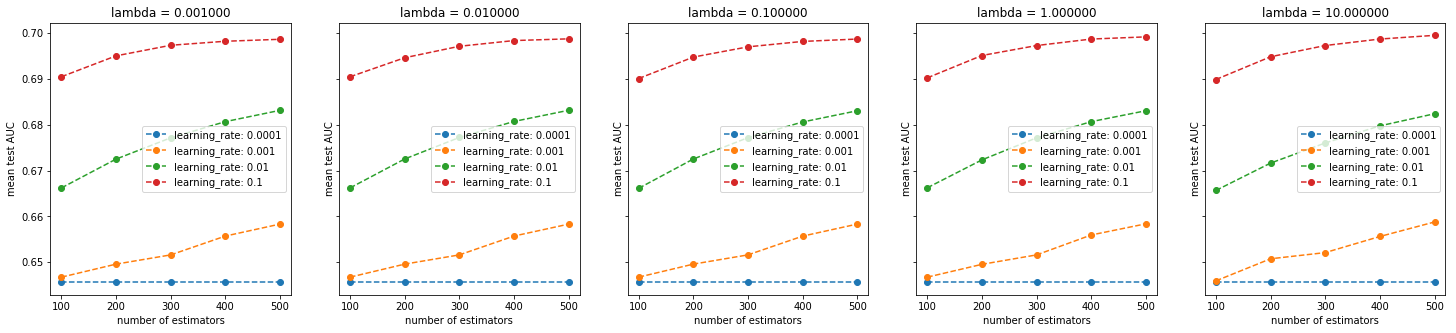

In [178]:
fig, (ax1, ax2, ax3, ax4, ax5) = subplots(nrows=1,ncols=5,figsize=(25, 5), sharey=True)
ax = [ax1, ax2, ax3, ax4, ax5]

for i, score in enumerate(mean_test_score_xgb):
    for j,s in enumerate(score):
        ax[i].plot(n_estimators, score[j,], '--',marker = 'o', label = 'learning_rate: %s'%(learning_rate[j]))
    ax[i].set_xlabel('number of estimators')
    ax[i].set_ylabel('mean test AUC')
    ax[i].set_title('lambda = %f'%reg_lambda[i])
    ax[i].legend()

In [179]:
grid_search_xgb.best_params_

{'learning_rate': 0.1, 'n_estimators': 500, 'reg_lambda': 10}

### XGBoost, Random Forest, AdaBoost, GradientBoosting (Tuned)

In [170]:
clf1 = XGBClassifier(n_estimators=500, learning_rate=0.1, reg_lambda=10,sub_sample = 1, nthread=3)
clf2 = RandomForestClassifier(n_estimators=500, max_features = 'sqrt')
clf3 = AdaBoostClassifier(n_estimators=200, learning_rate = 1)
clf4 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3)

start = time.time()
clf1.fit(X_train,y_train)
print 'XGBoost model fitting time: {}s'.format(time.time()-start)

start = time.time()
clf2.fit(X_train,y_train)
print 'Random Forest model fitting time: {}s'.format(time.time()-start)

start = time.time()
clf3.fit(X_train,y_train)
print 'AdaBoost model fitting time: {}s'.format(time.time()-start)

start = time.time()
clf4.fit(X_train,y_train)
print 'Gradient Boosting model fitting time: {}s'.format(time.time()-start)

y_pred_xb = clf1.predict(X_test)
y_pred_rf = clf2.predict(X_test)
y_pred_ab = clf3.predict(X_test)
y_pred_gb = clf4.predict(X_test)

y_pred_prob_xb = clf1.predict_proba(X_test)[:,1]
y_pred_prob_rf = clf2.predict_proba(X_test)[:,1]
y_pred_prob_ab = clf3.predict_proba(X_test)[:,1]
y_pred_prob_gb = clf4.predict_proba(X_test)[:,1]

XGBoost model fitting time: 184.918256998s
Random Forest model fitting time: 96.448251009s
AdaBoost model fitting time: 43.1542699337s
Gradient Boosting model fitting time: 304.054783821s


In [105]:
roc_auc_score(y_test, y_pred_prob_ab)

0.68665854070510657

In [156]:
mean_tree = np.mean([y_pred_prob_nn,y_pred_prob_xb,y_pred_prob_rf,y_pred_prob_ab,y_pred_prob_gb],axis = 0)

In [162]:
mean_all = np.mean([y_pred_prob_nn[:,0],y_pred_prob_xb,y_pred_prob_rf,y_pred_prob_ab,y_pred_prob_gb],axis = 0)

In [159]:
mean_tree.shape

(29775,)

In [250]:
roc_auc_score(y_test, y_pred_prob_gb)

0.69780127082565191

In [163]:
roc_auc_score(y_test, mean_all)

0.70090672043309321

#### Important Features

In [123]:
fimp_xgb = zip(X_features_nl.columns.values.tolist(),clf1.feature_importances_.tolist())
fimp_rf = zip(X_features_nl.columns.values.tolist(),clf2.feature_importances_.tolist())
fimp_ab = zip(X_features_nl.columns.values.tolist(),clf3.feature_importances_.tolist())
fimp_gb = zip(X_features_nl.columns.values.tolist(),clf4.feature_importances_.tolist())

#### xgboost

In [124]:
sorted(fimp_xgb, key = lambda x: x[1], reverse=True)[:10]

[('num_lab_procedures', 0.0842607319355011),
 ('num_medications', 0.06120826676487923),
 ('time_in_hospital', 0.037360891699790955),
 ('number_inpatient', 0.030206676572561264),
 ('num_procedures', 0.029610492289066315),
 ('number_diagnoses', 0.027225755155086517),
 ('discharge_disposition_id_11', 0.01768680475652218),
 ('number_emergency', 0.015103338286280632),
 ('medical_specialty_missing', 0.01311605703085661),
 ('number_outpatient', 0.012122416868805885)]

#### random forest

In [125]:
sorted(fimp_rf, key = lambda x: x[1], reverse=True)[:10]

[('num_lab_procedures', 0.046693118462992095),
 ('num_medications', 0.04405505587745685),
 ('number_inpatient', 0.038163759776082495),
 ('time_in_hospital', 0.03345436975303617),
 ('number_diagnoses', 0.02641718657260411),
 ('num_procedures', 0.02323786713841861),
 ('number_outpatient', 0.014310012528842595),
 ('number_emergency', 0.012537456665637596),
 ('gender_Female', 0.009983448436393708),
 ('gender_Male', 0.009948629462961755)]

#### adaboost

In [126]:
sorted(fimp_ab, key = lambda x: x[1], reverse=True)[:10]

[('number_inpatient', 0.07),
 ('num_medications', 0.02),
 ('num_lab_procedures', 0.015),
 ('number_emergency', 0.015),
 ('number_diagnoses', 0.015),
 ('time_in_hospital', 0.01),
 ('number_outpatient', 0.01),
 ('admission_type_id_6', 0.01),
 ('admission_source_id_17', 0.01),
 ('diag_2_648', 0.01)]

#### gradient boosting

In [127]:
sorted(fimp_gb, key = lambda x: x[1], reverse=True)[:10]

[('num_lab_procedures', 0.04456432989881007),
 ('num_medications', 0.03936502873842811),
 ('number_inpatient', 0.03920082062968408),
 ('time_in_hospital', 0.02189412388677898),
 ('number_diagnoses', 0.018625520197373156),
 ('num_procedures', 0.018328609369734888),
 ('discharge_disposition_id_11', 0.016247568130417875),
 ('number_emergency', 0.014782068886779619),
 ('number_outpatient', 0.013969133786685833),
 ('discharge_disposition_id_1', 0.012767636771680826)]

#### ROC Curve

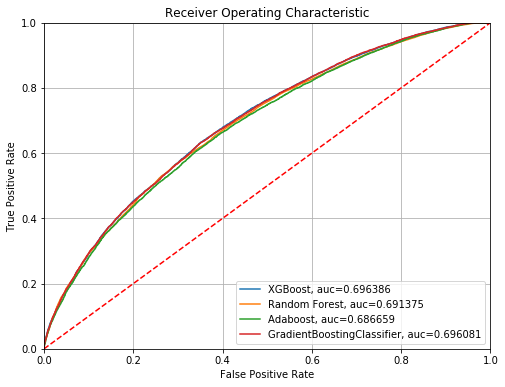

In [171]:
fpr = dict()
tpr = dict()
roc_auc = dict()
model_t = ['XGBoost','Random Forest','Adaboost', 'GradientBoostingClassifier']
y_pred_prob_t = [y_pred_prob_xb, y_pred_prob_rf, y_pred_prob_ab, y_pred_prob_gb]


plt.figure(figsize=(8,6))

for i in range(len(model_t)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob_t[i])
    roc_auc[i] = roc_auc_score(y_test, y_pred_prob_t[i])
    
for i in range(len(model_t)):
    plt.plot(fpr[i], tpr[i], label = '%s, auc=%f'%(model_t[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)

#### PR Curve

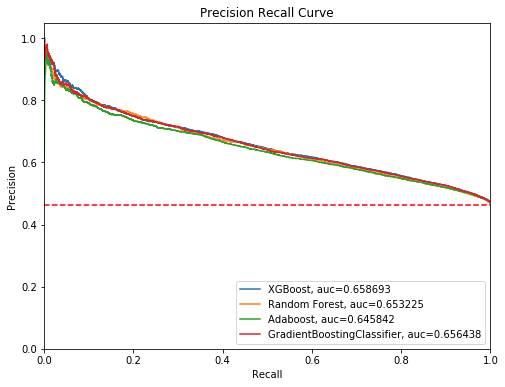

In [192]:
precision = dict()
recall = dict()
pr_auc = dict()

for i in range(len(model_t)):
    precision[i], recall[i], _ = precision_recall_curve(y_test, y_pred_prob_t[i])
    pr_auc[i] = average_precision_score(y_test, y_pred_prob_t[i])
 
plt.figure(figsize=(8,6))

for i in range(len(model_t)):
    plt.step(recall[i], precision[i],
         where='post', label = '%s, auc=%f'%(model_t[i], pr_auc[i]))

plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.plot([0, 1], [baseline, baseline], 'r--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")

#### Calibration

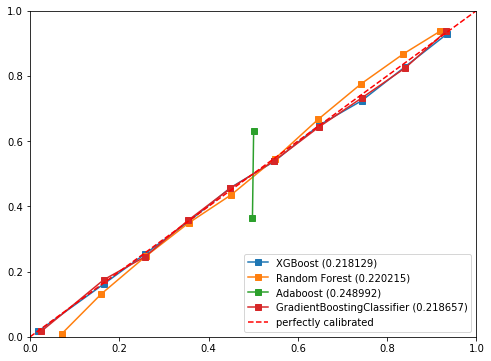

In [176]:
fraction_of_positives = dict()
mean_predicted_value = dict()
b_score = dict()

plt.figure(figsize=(8,6))

for i in range(len(model_t)):
    fraction_of_positives[i], mean_predicted_value[i] = calibration_curve(y_test,y_pred_prob_t[i], n_bins=10)
    b_score[i] = brier_score_loss(y_test, y_pred_prob_t[i])
for i in range(len(model_t)):
    plt.plot(mean_predicted_value[i], fraction_of_positives[i], "s-", label = '%s (%f)'%(model_t[i],b_score[i]))
plt.plot([0, 1], [0, 1], 'r--', label = 'perfectly calibrated')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")

### Naive Bayes

In [53]:
# X_train_num = np.array(num_log[num])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
clf_nb = GaussianNB()
clf_gau = GaussianNB()
clf_ber = BernoulliNB()

clf_nb.fit(X_train,y_train)
clf_gau.fit(X_train_num,y_train)
clf_ber.fit(X_train_cat,y_train)

y_pred_prob_nb = clf_nb.predict_proba(X_test)[:,1]
y_pred_prob_gau = clf_gau.predict_proba(X_test_num)[:,1]
y_pred_prob_ber = clf_ber.predict_proba(X_test_cat)[:,1]

#### ROC Curve

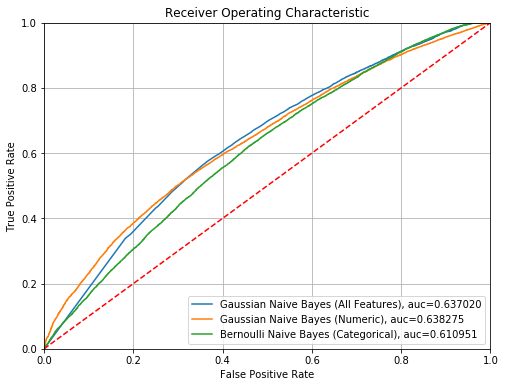

In [20]:
fpr = dict()
tpr = dict()
roc_auc = dict()
model_n = ['Gaussian Naive Bayes (All Features)','Gaussian Naive Bayes (Numeric)', 'Bernoulli Naive Bayes (Categorical)']
y_pred_prob_n = [y_pred_prob_nb, y_pred_prob_gau, y_pred_prob_ber]


plt.figure(figsize=(8,6))

for i in range(len(model_n)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob_n[i])
    roc_auc[i] = roc_auc_score(y_test, y_pred_prob_n[i])
    
for i in range(len(model_n)):
    plt.plot(fpr[i], tpr[i], label = '%s, auc=%f'%(model_n[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)

#### PR Curve

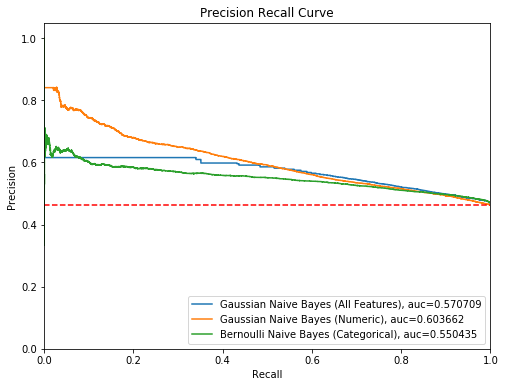

In [21]:
precision = dict()
recall = dict()
pr_auc = dict()

for i in range(len(model_n)):
    precision[i], recall[i], _ = precision_recall_curve(y_test, y_pred_prob_n[i])
    pr_auc[i] = average_precision_score(y_test, y_pred_prob_n[i])
 
plt.figure(figsize=(8,6))

for i in range(len(model_n)):
    plt.step(recall[i], precision[i],
         where='post', label = '%s, auc=%f'%(model_n[i], pr_auc[i]))

plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.plot([0, 1], [baseline, baseline], 'r--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")

### Linear Models

#### Feature Transformatiion (fit both with/without transformation)

In [57]:
diag_1_group = ['diag7', 'diag8', 'diag9', 'diag16', 'diag17', 'diag10', 'diabetes']
diag_2_group = ['diag7', 'diag8', 'diag3', 'diag10', 'diabetes']
diag_3_group = ['diag7', 'diag8', 'diag3', 'diag10', 'supplementary', 'diabetes']

diabetes.diag_1 = diabetes.diag_1.apply(lambda x: 'other' if x not in diag_1_group else x)
diabetes.diag_2 = diabetes.diag_2.apply(lambda x: 'other' if x not in diag_2_group else x)
diabetes.diag_3 = diabetes.diag_3.apply(lambda x: 'other' if x not in diag_3_group else x)

In [58]:
#rebin admission & discharge
diabetes.admission_type_id = diabetes.admission_type_id.apply(lambda x: 'other' if x not in ['1','2','3'] else x)
diabetes.admission_source_id = diabetes.admission_source_id.apply(lambda x: 'other' if x not in ['1','7'] else x)
diabetes.discharge_disposition_id = diabetes.discharge_disposition_id.apply(lambda x: 'other' if x not in ['1'] else x)

#rebin age
age1 = ['[40-50)','[30-40)','[20-30)','[10-20)','[0-10)']
age2 = ['[60-70)','[50-60)']
age3 = ['[70-80)','[80-90)','[90-100)']

def regroup_age(age):
    if age in age1:
        return '[0-50)'
    if age in age2:
        return '[50-70)'
    if age in age3:
        return '[70-100)'

diabetes.age = diabetes.age.apply(regroup_age)

In [59]:
# diabetes.number_inpatient.value_counts()

In [60]:
# diabetes.number_outpatient.value_counts()

In [61]:
# diabetes.number_emergency.value_counts()

In [62]:
diabetes.number_inpatient = diabetes.number_inpatient.apply(lambda x:np.log10(x+0.1))
diabetes.number_outpatient = diabetes.number_outpatient.apply(lambda x:np.log10(x+0.1))
diabetes.number_emergency = diabetes.number_emergency.apply(lambda x:np.log10(x+0.1))

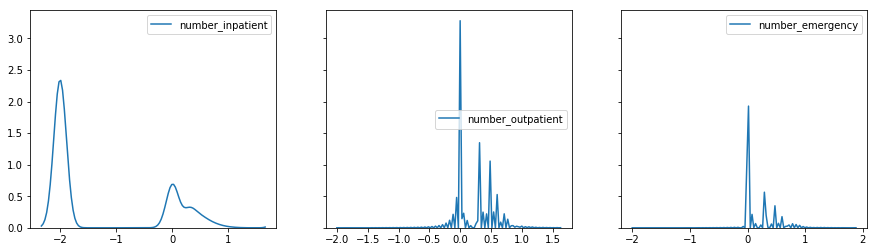

In [66]:
fig, (ax1, ax2, ax3) = subplots(nrows=1,ncols=3,figsize=(15,4), sharey=True)
ax = [ax1, ax2, ax3]
encounter = ['number_inpatient', 'number_outpatient', 'number_emergency']

for i,a in enumerate(ax):
    sns.kdeplot(diabetes[encounter[i]], ax=a)

In [67]:
num = diabetes.select_dtypes(include=[int64]).columns.values.tolist()
cat = diabetes.select_dtypes(include=[object]).drop('readmitted',axis=1).columns.values.tolist()

In [68]:
cat

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'insulin',
 'change',
 'diabetesMed']

In [69]:
encoder = OneHotEncoder()
le = LabelEncoder()

X_num = np.array(diabetes[num])
X_cat = diabetes[cat].apply(le.fit_transform)
X_cat = encoder.fit_transform(X_cat).toarray()
X_l = np.concatenate((X_num,X_cat), axis = 1)

y = diabetes.readmitted.apply(lambda x: 0 if x =='NO' else 1)

X_train, X_test, y_train, y_test = train_test_split(X_l, y, test_size=0.3, random_state=24)

In [70]:
cat_list = []
for c in cat:
    values = sorted(set(diabetes[c].values.tolist()))
    for v in values:
        cat_list.append('{}_{}'.format(c,v))   

col_names = num + cat_list
X_features_l = pd.DataFrame(X_l, columns=col_names)

In [71]:
X_features_l.shape

(99248, 61)

### Logistic Regression

#### Cross-Validation

In [114]:
scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train)
X_test_lr = scaler.transform(X_test)

In [116]:
X_train_lr.shape

(69473, 148)

In [88]:
clf_lr = LogisticRegression()
C = [0.001, 0.01, 0.1, 1, 10]
penalty = ['l2','l1']
param_grid = dict(C = C, penalty = penalty)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=24)
grid_search_lr = GridSearchCV(clf_lr, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_search_lr.fit(X_train_lr, y_train)
result_lr = grid_search_lr.cv_results_

In [89]:
grid_search_lr.best_params_

{'C': 1, 'penalty': 'l1'}

In [90]:
mean_test_score_lr = np.transpose(result_lr['mean_test_score'].reshape(len(C), len(penalty)))

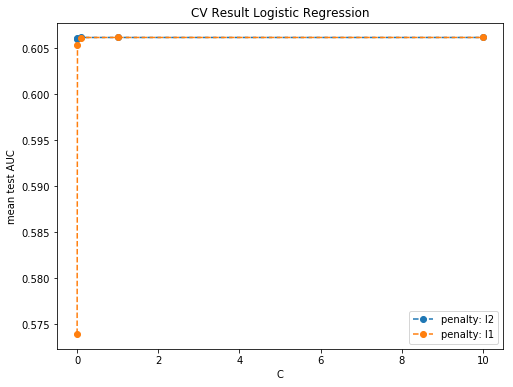

In [91]:
plt.figure(figsize=(8,6))
for i, score in enumerate(mean_test_score_lr):
    plt.plot(C, mean_test_score_lr[i,], '--',marker = 'o', label = 'penalty: %s'%(penalty[i]))
plt.xlabel('C')
plt.ylabel('mean test AUC')
plt.title('CV Result Logistic Regression')
plt.legend()

In [ ]:
poly = PolynomialFeatures(2)
X_train_lr2 = poly.fit_transform(X_train_lr)
X_test_lr2 = poly.fit_transform(X_test_lr)

clf_lr2 = LogisticRegression(penalty='l2', C = 0.001)
clf_lr2.fit(X_train_lr2, y_train)
y_pred_prob_lr2 = clf_lr.predict_proba(X_test_lr2)[:,1]

In [ ]:
roc_auc_score(y_test, y_pred_prob_lr2)

### Linear SVM

In [117]:
scaler = MinMaxScaler()#standardize
X_train_svc = scaler.fit_transform(X_train)
X_test_svc = scaler.transform(X_test)

In [80]:
clf_svc = LinearSVC()
C = [0.001, 0.01, 0.1, 1, 10]
loss = ['squared_hinge', 'hinge']
param_grid = dict(C = C, loss = loss)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=24)
grid_search_svc = GridSearchCV(clf_svc, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold)
grid_search_svc.fit(X_train_svc, y_train)
result_svc = grid_search_svc.cv_results_

In [81]:
grid_search_svc.best_params_

{'C': 0.01, 'loss': 'squared_hinge'}

In [82]:
mean_test_score_svc = np.transpose(result_svc['mean_test_score'].reshape(len(C), len(loss)))

In [83]:
C

[0.001, 0.01, 0.1, 1, 10]

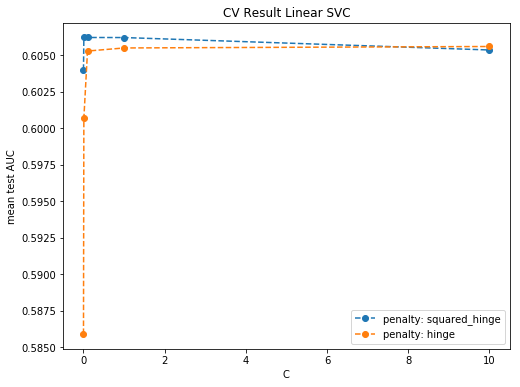

In [84]:
plt.figure(figsize=(8,6))
for i, score in enumerate(mean_test_score_svc):
    plt.plot(C, mean_test_score_svc[i,], '--',marker = 'o', label = 'penalty: %s'%(loss[i]))
plt.xlabel('C')
plt.ylabel('mean test AUC')
plt.title('CV Result Linear SVC')
plt.legend()

### Comparing Logistic & Linear SVC

In [92]:
clf_lr = LogisticRegression(penalty='l1', C = 1)
clf_svc = LinearSVC(loss = 'squared_hinge', C = 0.01)

clf_lr.fit(X_train_lr,y_train)
clf_svc.fit(X_train_svc,y_train)

y_pred_lr = clf_lr.predict(X_test_lr)
y_pred_svc = clf_svc.predict(X_test_svc)

y_pred_prob_lr = clf_lr.predict_proba(X_test_lr)[:,1]
y_pred_prob_svc = clf_svc.decision_function(X_test_svc)

In [118]:
# 148 features
clf_lr = LogisticRegression(penalty='l2', C = 0.001)
clf_svc = LinearSVC(loss = 'hinge', C = 10)

clf_lr.fit(X_train_lr,y_train)
clf_svc.fit(X_train_svc,y_train)

y_pred_lr = clf_lr.predict(X_test_lr)
y_pred_svc = clf_svc.predict(X_test_svc)

y_pred_prob_lr = clf_lr.predict_proba(X_test_lr)[:,1]
y_pred_prob_svc = clf_svc.decision_function(X_test_svc)

In [94]:
roc_auc_score(y_test, y_pred_prob_lr)

0.68431999125380882

### Lasso (Logistic Regression)

In [21]:
lr_lasso = LogisticRegression(penalty='l2', C = 0.0001) #high C to shrink coefs of variables to zero
lr_coef = zip(X_features_nl.columns.values.tolist(),lr_lasso.coef_[0].tolist())

In [23]:
pd.DataFrame(sorted([x for x in lr_coef if x[1] != 0], key = lambda x: x[1], reverse=True))

,0,1
0,number_inpatient,0.439092
1,number_diagnoses,0.122859
2,number_emergency,0.069651
3,number_outpatient,0.051927
4,diabetesMed_Yes,0.044256
5,admission_source_id_7,0.034187
6,admission_type_id_6,0.030511
7,discharge_disposition_id_6,0.016763
8,diabetesMed_No,-0.000088
9,admission_type_id_3,-0.000122


#### ROC Curve

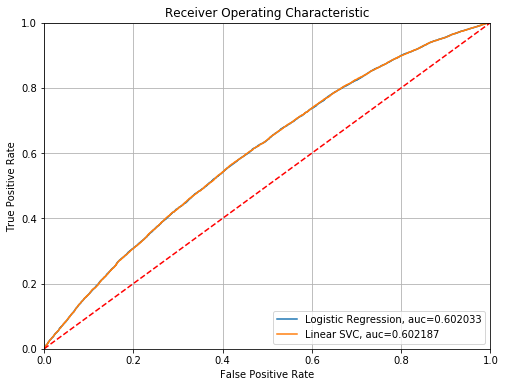

In [93]:
fpr = dict()
tpr = dict()
roc_auc = dict()
model_l = ['Logistic Regression', 'Linear SVC']
y_pred_prob_l = [y_pred_prob_lr, y_pred_prob_svc]

plt.figure(figsize=(8,6))

for i in range(len(model_l)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob_l[i])
    roc_auc[i] = roc_auc_score(y_test, y_pred_prob_l[i])
    
for i in range(len(model_l)):
    plt.plot(fpr[i], tpr[i], label = '%s, auc=%f'%(model_l[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)

#### PR Curve 

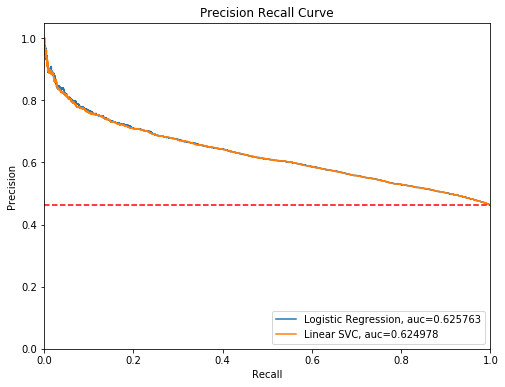

In [29]:
precision = dict()
recall = dict()
pr_auc = dict()

for i in range(len(model_l)):
    precision[i], recall[i], _ = precision_recall_curve(y_test, y_pred_prob_l[i])
    pr_auc[i] = average_precision_score(y_test, y_pred_prob_l[i])
 
plt.figure(figsize=(8,6))

for i in range(len(model_l)):
    plt.step(recall[i], precision[i],
         where='post', label = '%s, auc=%f'%(model_l[i], pr_auc[i]))

plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.plot([0, 1], [baseline, baseline], 'r--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")


#### Calibration

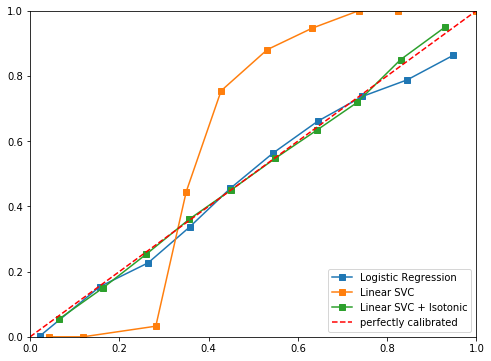

In [36]:
isotonic = CalibratedClassifierCV(LinearSVC(C = 0.01, loss='hinge'), cv=2, method='isotonic')
isotonic.fit(X_train_svc, y_train)
y_pred_prob_iso = isotonic.predict_proba(X_test_svc)[:,1]

model_l = ['Logistic Regression', 'Linear SVC', 'Linear SVC + Isotonic']
y_pred_prob_l = [y_pred_prob_lr, y_pred_prob_svc, y_pred_prob_iso]

fraction_of_positives = dict()
mean_predicted_value = dict()

plt.figure(figsize=(8,6))

for i in range(len(model_l)):
    if i == 0 or i == 2:
        fraction_of_positives[i], mean_predicted_value[i] = calibration_curve(y_test,y_pred_prob_l[i], n_bins=10)
    else:
        y_pred_prob_l[i] = (y_pred_prob_l[i] - y_pred_prob_l[i].min()) / (y_pred_prob_l[i].max() - y_pred_prob_l[i].min())
        fraction_of_positives[i], mean_predicted_value[i] = calibration_curve(y_test,y_pred_prob_l[i], n_bins=10)
for i in range(len(model_l)):
    plt.plot(mean_predicted_value[i], fraction_of_positives[i], "s-", label = model_l[i])
plt.plot([0, 1], [0, 1], 'r--', label = 'perfectly calibrated')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")

### Neural Network

In [119]:
import time
t0 = time.time()
num_features = len(X_train_lr[0,:])
model = Sequential()
model.add(Dense(64, input_dim=num_features, kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(2)))
model.add(Dropout(0.5))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
optimizer = Nadam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train_lr,y_train,batch_size = 600, epochs = 200, verbose = 0)
t1 = time.time()
diff = t1-t0
print(diff)

121.620148897


In [120]:
y_pred_prob_nn = model.predict(X_test_lr)

In [39]:
y_pred_prob_nn[:,0]

array([ 0.39892411,  0.51958299,  0.69761914, ...,  0.44353423,
        0.43510893,  0.70766622], dtype=float32)

## correlation matrix

In [164]:
result_all = pd.DataFrame({'naive_bayes':y_pred_prob_nb,'linear_svc':y_pred_prob_svc,'logistic':y_pred_prob_lr,'neural_net':y_pred_prob_nn[:,0],'xgboost':y_pred_prob_xb, 'random_forest':y_pred_prob_rf, 'adaboost':y_pred_prob_ab, 'gradient_boost':y_pred_prob_gb})

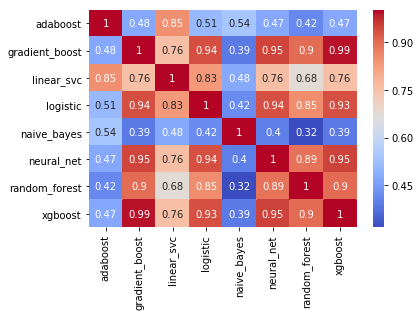

In [165]:
sns.heatmap(result_all.corr(),annot=True,cmap='coolwarm')

## Averaging RF, XGBOOST, NN

In [121]:
mean_rf_xb_nn = np.mean([y_pred_prob_rf, y_pred_prob_xb, y_pred_prob_nn[:,0]],axis = 0)

In [49]:
rf_xb_nn_2 = 0*y_pred_prob_rf+0.9*y_pred_prob_xb+0.1*y_pred_prob_nn[:,0]

In [41]:
roc_auc_score(y_test,mean_rf_xb_nn)

0.70065776650239253

In [50]:
roc_auc_score(y_test,rf_xb_nn_2)

0.69857019001768328

### ROC Curve

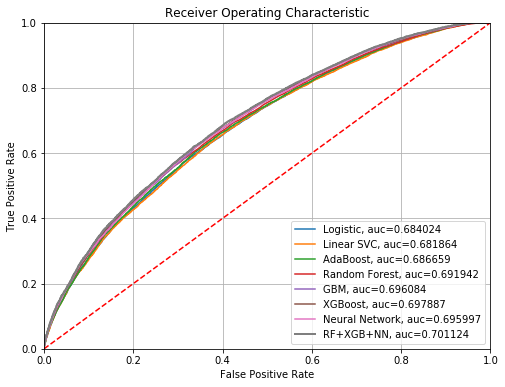

In [141]:
fpr = dict()
tpr = dict()
roc_auc = dict()
model = ['Logistic', 'Linear SVC', 'AdaBoost','Random Forest','GBM','XGBoost','Neural Network','RF+XGB+NN']
y_pred_prob = [y_pred_prob_lr, y_pred_prob_svc, y_pred_prob_ab, y_pred_prob_rf,y_pred_prob_gb,y_pred_prob_xb, y_pred_prob_nn,mean_rf_xb_nn]


plt.figure(figsize=(8,6))

for i in range(len(model)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[i])
    roc_auc[i] = roc_auc_score(y_test, y_pred_prob[i])
    
for i in range(len(model)):
    if i != len(model) - 1:
        plt.plot(fpr[i], tpr[i], label = '%s, auc=%f'%(model[i], roc_auc[i]))
    else:
        plt.plot(fpr[i], tpr[i], label = '%s, auc=%f'%(model[i], roc_auc[i]),linewidth=2)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)

In [163]:
auc = [x[1] for x in roc_auc.items()]
auc_df = pd.DataFrame({'Model':model, 'AUC': auc })
auc_df[['Model','AUC']]

,Model,AUC
0,Logistic,0.684024
1,Linear SVC,0.681864
2,AdaBoost,0.686659
3,Random Forest,0.691942
4,GBM,0.696084
5,XGBoost,0.697887
6,Neural Network,0.695997
7,RF+XGB+NN,0.701124


### P-R Curve

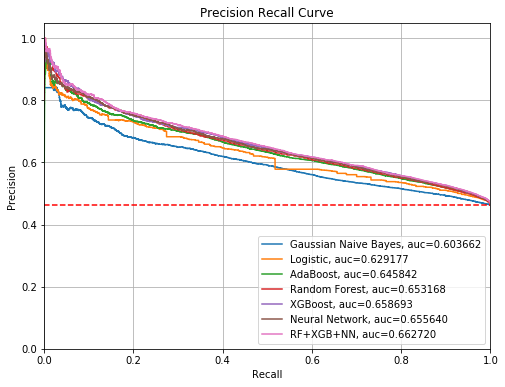

In [71]:
precision = dict()
recall = dict()
pr_auc = dict()

for i in range(len(model)):
    precision[i], recall[i], _ = precision_recall_curve(y_test, y_pred_prob[i])
    pr_auc[i] = average_precision_score(y_test, y_pred_prob[i])
 
plt.figure(figsize=(8,6))

for i in range(len(model)):
    plt.step(recall[i], precision[i],
         where='post', label = '%s, auc=%f'%(model[i], pr_auc[i]))

plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.plot([0, 1], [baseline, baseline], 'r--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.grid(True)

# precision, recall, _ = precision_recall_curve(y_test, y_pred4_prob)

# plt.step(recall, precision, color='b', alpha=0.2,
#          where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.2,
#                  color='b')

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])

### Calibration

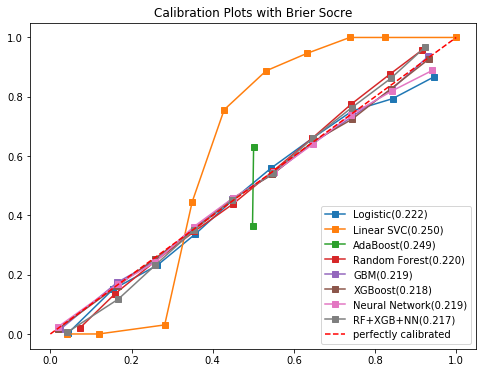

In [142]:
fraction_of_positives = dict()
mean_predicted_value = dict()
brier_score = dict()

plt.figure(figsize=(8,6))

for i in range(len(model)):
    if model[i] == 'Linear SVC':
        y_pred_prob[i] = (y_pred_prob[i] - y_pred_prob[i].min())/(y_pred_prob[i].max() - y_pred_prob[i].min())
    fraction_of_positives[i], mean_predicted_value[i] = calibration_curve(y_test, y_pred_prob[i], n_bins=10) 
    brier_score[i] = brier_score_loss(y_test,y_pred_prob[i], pos_label=y.max())
for i in range(len(model)):
    plt.plot(mean_predicted_value[i], fraction_of_positives[i], "s-", label = '%s(%1.3f)' %(model[i],brier_score[i]))
plt.plot([0, 1], [0, 1], 'r--', label = 'perfectly calibrated')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title('Calibration Plots with Brier Socre')

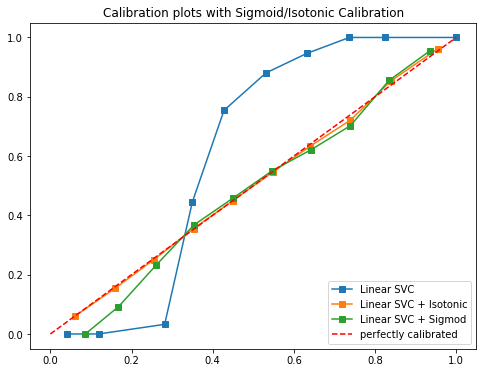

In [193]:
isotonic = CalibratedClassifierCV(LinearSVC(C = 0.01, loss='hinge'), cv=3, method='isotonic')
sigmoid = CalibratedClassifierCV(LinearSVC(C = 0.01, loss='hinge'), cv=3, method='sigmoid')
isotonic.fit(X_train_svc, y_train)
sigmoid.fit(X_train_svc, y_train)
y_pred_prob_iso = isotonic.predict_proba(X_test_svc)[:,1]
y_pred_prob_sig = sigmoid.predict_proba(X_test_svc)[:,1]

model_fix = ['Linear SVC', 'Linear SVC + Isotonic', 'Linear SVC + Sigmod']
y_pred_prob_fix = [y_pred_prob_svc, y_pred_prob_iso, y_pred_prob_sig]

fraction_of_positives = dict()
mean_predicted_value = dict()

plt.figure(figsize=(8,6))

for i in range(len(model_fix)):
    if model_fix[i] == 'Linear SVC':
        y_pred_prob_fix[i] = (y_pred_prob_fix[i] - y_pred_prob_fix[i].min())/(y_pred_prob_fix[i].max() - y_pred_prob_fix[i].min())
    fraction_of_positives[i], mean_predicted_value[i] = calibration_curve(y_test, y_pred_prob_fix[i], n_bins=10) 
    
for i in range(len(model_fix)):
    plt.plot(mean_predicted_value[i], fraction_of_positives[i], "s-", label = model_fix[i])
plt.plot([0, 1], [0, 1], 'r--', label = 'perfectly calibrated')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title('Calibration plots with Sigmoid/Isotonic Calibration')



# fraction_of_positives, mean_predicted_value = calibration_curve(y_test,y_pred4_prob, n_bins=10)
# plt.plot(mean_predicted_value, fraction_of_positives, "s-")
# plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
# plt.legend()

## Cost Analysis

In [126]:
len(y_test)

29775

In [127]:
y_test.value_counts()

0    15999
1    13776
Name: readmitted, dtype: int64

### Find threshold

In [128]:
TP_saving = 8182
FP_saving = -2409
thresh = -FP_saving*1.0/(TP_saving-FP_saving)
print "threshold = {}".format(thresh)

threshold = 0.227457275045


In [143]:
xgb_pred = np.where(y_pred_prob_xb < thresh, 0, 1)
gb_pred = np.where(y_pred_prob_gb < thresh, 0, 1)
ab_pred = np.where(y_pred_prob_ab < thresh, 0, 1)
rf_pred = np.where(y_pred_prob_rf < thresh, 0, 1)
nn_pred = np.where(y_pred_prob_nn < thresh, 0, 1)
# nb_pred = np.where(y_pred_prob_gau < thresh, 0, 1)
lr_pred = np.where(y_pred_prob_lr < thresh, 0, 1)
average_pred = np.where(mean_rf_xb_nn < thresh, 0, 1)

y_pred_prob_svc = (y_pred_prob_svc - y_pred_prob_svc.min())/(y_pred_prob_svc.max() - y_pred_prob_svc.min())
svc_pred = np.where(y_pred_prob_svc < thresh, 0, 1)

In [144]:
def cal_saving(tp, fp, tp_s, fp_s):
    saving = tp*tp_s + fp*fp_s
    return saving

### Get confusion matrix by applying threshold

In [145]:
xgb_conf = confusion_matrix(y_test, xgb_pred)
gb_conf = confusion_matrix(y_test, gb_pred)
rf_conf = confusion_matrix(y_test, rf_pred)
ab_conf = confusion_matrix(y_test, ab_pred)
nn_conf = confusion_matrix(y_test, nn_pred)
# nb_conf = confusion_matrix(y_test, nb_pred)
lr_conf = confusion_matrix(y_test, lr_pred)
svc_conf = confusion_matrix(y_test, svc_pred)
average_conf = confusion_matrix(y_test, average_pred)

In [147]:
conf = [xgb_conf, gb_conf, rf_conf, nn_conf, ab_conf,lr_conf,svc_conf, average_conf]
model_s = ['XGBoost', 'GBM', 'Random Forest', 'Neural Network', 'Adaboost', 'Logistic Regression', 'Linear SVC', 'RF+XGB+MLP']

savings = []
for c in conf:
    saving = cal_saving(c[1][1], c[0][1], TP_saving, FP_saving)
    savings.append(saving)


In [148]:
saving_df = pd.DataFrame({'Model':model_s, 'Savings': savings})

In [149]:
saving_df.Savings = saving_df.Savings.map('${:,.2f}'.format)

### Estimated Savings

In [150]:
saving_df.sort_values('Savings', ascending=False)

,Model,Savings
7,RF+XGB+MLP,"$76,618,001.00"
3,Neural Network,"$76,393,112.00"
0,XGBoost,"$76,383,820.00"
1,GBM,"$76,356,650.00"
2,Random Forest,"$76,088,907.00"
5,Logistic Regression,"$75,970,746.00"
6,Linear SVC,"$75,334,779.00"
4,Adaboost,"$74,173,641.00"
